In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
file = open("/content/Romeo and Juliet.txt", "r", encoding = "utf8")

lines = []
for i in file:
    lines.append(i)

In [ ]:
data = ""
for i in lines:
  data = ' '. join(lines)

In [ ]:
data = data.split()
data = ' '.join(data)
data[:500]

'\ufeff The Project Gutenberg eBook of Romeo and Juliet This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook. Title: '

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

In [ ]:
# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

In [ ]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

4297


In [ ]:
len(sequence_data)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

In [ ]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))

The Length of sequences are:  29283


In [ ]:
sequences = np.array(sequences)
sequences[:10]

array([[1927,    1,   54,  129],
       [   1,   54,  129,  306],
       [  54,  129,  306,    6],
       [ 129,  306,    6,   12],
       [ 306,    6,   12,    2],
       [   6,   12,    2,   22],
       [  12,    2,   22,   16],
       [   2,   22,   16,  306],
       [  22,   16,  306,    8],
       [  16,  306,    8,   18]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[1927    1   54]
 [   1   54  129]
 [  54  129  306]
 [ 129  306    6]
 [ 306    6   12]
 [   6   12    2]
 [  12    2   22]
 [   2   22   16]
 [  22   16  306]
 [  16  306    8]]
Response:  [129 306   6  12   2  22  16 306   8  18]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             42970     
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 4297)              4301297   
                                                                 
Total params: 17393267 (66.35 MB)
Trainable params: 17393267 (66.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


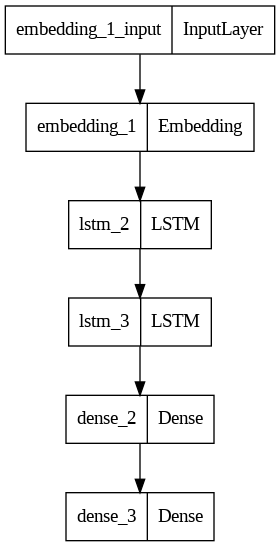

In [ ]:
from tensorflow import keras
from keras.utils import plot_model

plot_model(model, to_file='plot.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=50, batch_size=64, callbacks=[checkpoint])

Epoch 1/50
458/458 [==============================] - ETA: 0s - loss: 6.8146
Epoch 1: loss improved from inf to 6.81460, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


458/458 [==============================] - 311s 667ms/step - loss: 6.8146
Epoch 2/50
458/458 [==============================] - ETA: 0s - loss: 6.4303
Epoch 2: loss improved from 6.81460 to 6.43030, saving model to next_words.h5
458/458 [==============================] - 300s 656ms/step - loss: 6.4303
Epoch 3/50
458/458 [==============================] - ETA: 0s - loss: 6.1660
Epoch 3: loss improved from 6.43030 to 6.16599, saving model to next_words.h5
458/458 [==============================] - 303s 660ms/step - loss: 6.1660
Epoch 4/50
458/458 [==============================] - ETA: 0s - loss: 5.9084
Epoch 4: loss improved from 6.16599 to 5.90844, saving model to next_words.h5
458/458 [==============================] - 295s 645ms/step - loss: 5.9084
Epoch 5/50
458/458 [==============================] - ETA: 0s - loss: 5.6298
Epoch 5: loss improved from 5.90844 to 5.62976, saving model to next_words.h5
458/458 [==============================] - 294s 642ms/step - loss: 5.6298
Epoch 6/50

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          # text = text.split(" ")
          # text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue